In [1]:
# 處理 array
import numpy as np

# 產生隨機 list，用於隨機產生出一組合法解
import random

# data visualisation and manipulation
# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
# STEP 1 Initialization:
# 隨機產生出一組合法解 (至多2的100次方種可能解)

def ramdomSolution():
    # 隨機生成 100 bits 0/1 長度
    string_status = [ random.randint(0,1) for _ in range(n)]
    currentValue = 0
    
    for i in range(n):
        if(string_status[i] == 1):
            currentValue += 1
            
    return string_status, currentValue
# n=100
# ramdomSolution()

In [3]:
# STEP 2 Transition: 產生一個或多個解 隨機 / 左右 移動
# 找鄰近解
# 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
# 採左右移動 (2)將任兩不同值位置 0、1對調  

# STEP 3 Evaluation: 評估一個或多個解 適應值(Objective value)大小

def getNeighbor(solution, value, case):
    
    neightbor_sol = solution.copy()
    neighbor_value = value

    if(case == 'left'):
        # 採左右移動 (1)使解往左走+1或往右走-1 0001->0010 or 0001->0000
        # 採左移 +1
        # 二進位左移 +1 ，超過歸 bit數 0 (ex: [1, 1, 1, 1] +1 -> [0, 0, 0, 0])

        for i in range(n-1,-1,-1):
            if(neightbor_sol[i] == 0):
                neightbor_sol[i] = 1
                neighbor_value += 1
                break
            else:
                neightbor_sol[i] = 0
                neighbor_value -= 1
    
    elif(case == 'random'):
        
        # 採隨機移動 (2)隨機找其中一個 bit 0換成 1 1換成 0 
        i = random.randint(0,n-1)

        # 多一個 1 
        if(neightbor_sol[i] == 0):

            neightbor_sol[i]=1
            neighbor_value += 1

        # 少一個 1 
        else: 
            neightbor_sol[i] = 0
            neighbor_value -= 1
 
    return neightbor_sol, neighbor_value
    
# n=4
# getNeighbor([0,1,1,0],2,'random')


In [4]:
# STEP 4 Determination: 將 STEP 3 評估出的適應值與先前的進行比較

def hillClimbing(current_sol, currrent_value, case):
    
    for i in range(run):
        neightbor_sol, neighbor_value = getNeighbor(current_sol, currrent_value, case)
        #print("\n鄰近解: " + str(neightbor_sol))
        #print("鄰近解獲利: " + str(neighbor_value))

        # 鄰近解若優於或等於先前解則更新
        if(currrent_value <= neighbor_value):

            current_sol = neightbor_sol
            currrent_value = neighbor_value
    
    return current_sol, currrent_value
    

In [5]:
def plotIteration(value_history, iteration):

    plt.title('circle of average convergence')
    plt.plot(range(1, iteration + 1), value_history, label='Objective Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.grid()
    plt.show()


In [6]:
# main code

# STEP 0 Setting: 初始參數:
global n,iteration,run; 

# 100 bits
n = 100 

# 迭代次數(Iteration)
iteration = 1000

# run 次數
run = 51

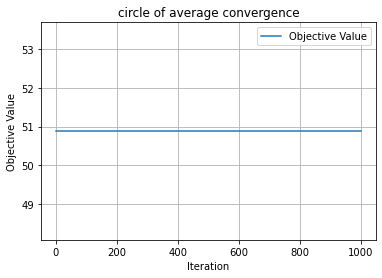

採左右移動最佳解:  [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
採左右移動最佳值:  61
採左右移動最佳平均解值 50.88235294117647


In [7]:
# 採左右移動 變數
# 採左右移動 加總 51run 並計算平均
left_avg_val = 0
left_total_val = 0

# 紀錄每次採左右移動迭代的值
left_iteration_history = []

# 紀錄採左右移動最佳解及最佳值
left_best_sol = []
left_best_value = 0

# 跑51次run平均1000次迭代
for i in range(run):
    
    # 新的一 run 先清空解暫存
    temp_history = []

    # STEP 1 Initial:
    # 隨機產生出一組合法解 
    left_current_sol, left_currrent_value = ramdomSolution()

    # 迭代 1000 次停止
    for k in range(iteration):
        left_current_sol, left_currrent_value = hillClimbing(left_current_sol, left_currrent_value, "left")
        # 紀錄採左右移動每次的值
        temp_history.append(left_currrent_value)
        # 紀錄採左右移動最佳解及最佳值
        if(left_currrent_value > left_best_value):
            left_best_value = left_currrent_value
            left_best_sol = left_current_sol
    
    # 紀錄採左右移動每次迭代的值
    left_iteration_history.append(temp_history)

    #print("\n第" + str(i+1) + "輪: ")
    #print("解: " + str(left_current_sol))
    #print("解值: " + str(left_currrent_value))
    
# list 轉 np array 方便平均計算
left_value_history = np.array(left_iteration_history)

# 加總每一行
left_total_val = left_value_history.sum(axis=0)
# 跑 51次平均值
left_avg_val = left_total_val / run

# 畫採左右移動的平均收斂圖
plotIteration(left_avg_val, iteration)
print("採左右移動最佳解: ", left_best_sol)
print("採左右移動最佳值: " ,left_best_value)
print("採左右移動最佳平均解值",max(left_avg_val)) 


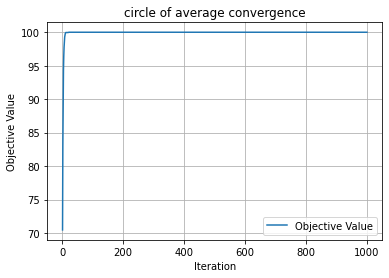

採隨機移動最佳解:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
採隨機移動最佳值:  100
採隨機移動最佳平均解值 100.0


In [8]:
# 採隨機移動 變數
# 採隨機移動 加總 51run 並計算平均
rand_avg_val = 0
rand_total_val = 0

# 紀錄每次採隨機移動迭代的值
rand_iteration_history = []

# 紀錄採隨機移動最佳解及最佳值
rand_best_sol = []
rand_best_value = 0

# 跑51次run平均1000次迭代
for i in range(run):
    
    # 新的一 run 先清空解暫存
    temp_history = []

    # STEP 1 Initial:
    # 隨機產生出一組合法解 
    rand_current_sol, rand_currrent_value = ramdomSolution()

    # 迭代 1000 次停止
    for k in range(iteration):
        rand_current_sol, rand_currrent_value = hillClimbing(rand_current_sol, rand_currrent_value, "random")
        # 紀錄採隨機移動每次的值
        temp_history.append(rand_currrent_value)
        # 紀錄採隨機移動最佳解及最佳值
        if(rand_currrent_value > rand_best_value):
            rand_best_value = rand_currrent_value
            rand_best_sol = rand_current_sol
    
    # 紀錄採隨機移動每次迭代的值
    rand_iteration_history.append(temp_history)

    #print("\n第" + str(i+1) + "輪: ")
    #print("解: " + str(rand_current_sol))
    #print("解值: " + str(rand_currrent_value))
    
# list 轉 np array 方便平均計算
rand_value_history = np.array(rand_iteration_history)

# 加總每一行
rand_total_val = rand_value_history.sum(axis=0)
# 跑 51次平均值
rand_avg_val = rand_total_val / run

# 畫採隨機移動的平均收斂圖
plotIteration(rand_avg_val, iteration)
print("採隨機移動最佳解: ", rand_best_sol)
print("採隨機移動最佳值: " ,rand_best_value)
print("採隨機移動最佳平均解值",max(rand_avg_val)) 
